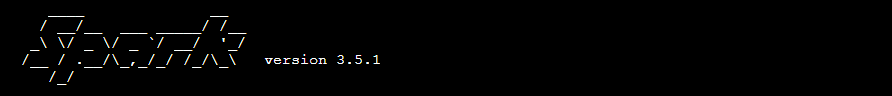

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession\
        .builder\
        .appName("CTR")\
        .getOrCreate()

In [23]:
df = spark.read.csv("mtcars.csv",
 header=True, sep=',')

In [24]:
# show the dataframe
df.show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [25]:
# count number of rows
df.count()

32

In [26]:
#The schema of the df object can be displayed using the following command:
df.printSchema()

root
 |-- model: string (nullable = true)
 |-- mpg: string (nullable = true)
 |-- cyl: string (nullable = true)
 |-- disp: string (nullable = true)
 |-- hp: string (nullable = true)
 |-- drat: string (nullable = true)
 |-- wt: string (nullable = true)
 |-- qsec: string (nullable = true)
 |-- vs: string (nullable = true)
 |-- am: string (nullable = true)
 |-- gear: string (nullable = true)
 |-- carb: string (nullable = true)



Select one or more columns:

In [27]:
# select the model column
df.select("model").show()

+-------------------+
|              model|
+-------------------+
|          Mazda RX4|
|      Mazda RX4 Wag|
|         Datsun 710|
|     Hornet 4 Drive|
|  Hornet Sportabout|
|            Valiant|
|         Duster 360|
|          Merc 240D|
|           Merc 230|
|           Merc 280|
|          Merc 280C|
|         Merc 450SE|
|         Merc 450SL|
|        Merc 450SLC|
| Cadillac Fleetwood|
|Lincoln Continental|
|  Chrysler Imperial|
|           Fiat 128|
|        Honda Civic|
|     Toyota Corolla|
+-------------------+
only showing top 20 rows



In [28]:
# summary statistics
df.summary("count", "min", "25%", "75%", "max").show()

+-------+-----------+----+---+-----+-----+----+-----+-----+---+---+----+----+
|summary|      model| mpg|cyl| disp|   hp|drat|   wt| qsec| vs| am|gear|carb|
+-------+-----------+----+---+-----+-----+----+-----+-----+---+---+----+----+
|  count|         32|  32| 32|   32|   32|  32|   32|   32| 32| 32|  32|  32|
|    min|AMC Javelin|10.4|  4|108.0|  105|2.76|1.513| 14.5|  0|  0|   3|   1|
|    25%|       NULL|15.2|4.0|120.3| 95.0|3.08|2.465|16.87|0.0|0.0| 3.0| 2.0|
|    75%|       NULL|22.8|8.0|318.0|180.0|3.92| 3.57| 18.9|1.0|1.0| 4.0| 4.0|
|    max| Volvo 142E|33.9|  8| 95.1|   97|4.93|5.424| 22.9|  1|  1|   5|   8|
+-------+-----------+----+---+-----+-----+----+-----+-----+---+---+----+----+



In [29]:
df.head(5)

[Row(model='Mazda RX4', mpg='21.0', cyl='6', disp='160.0', hp='110', drat='3.9', wt='2.62', qsec='16.46', vs='0', am='1', gear='4', carb='4'),
 Row(model='Mazda RX4 Wag', mpg='21.0', cyl='6', disp='160.0', hp='110', drat='3.9', wt='2.875', qsec='17.02', vs='0', am='1', gear='4', carb='4'),
 Row(model='Datsun 710', mpg='22.8', cyl='4', disp='108.0', hp='93', drat='3.85', wt='2.32', qsec='18.61', vs='1', am='1', gear='4', carb='1'),
 Row(model='Hornet 4 Drive', mpg='21.4', cyl='6', disp='258.0', hp='110', drat='3.08', wt='3.215', qsec='19.44', vs='1', am='0', gear='3', carb='1'),
 Row(model='Hornet Sportabout', mpg='18.7', cyl='8', disp='360.0', hp='175', drat='3.15', wt='3.44', qsec='17.02', vs='0', am='0', gear='3', carb='2')]

In [30]:
# get the last five
df.tail(5)

[Row(model='Lotus Europa', mpg='30.4', cyl='4', disp='95.1', hp='113', drat='3.77', wt='1.513', qsec='16.9', vs='1', am='1', gear='5', carb='2'),
 Row(model='Ford Pantera L', mpg='15.8', cyl='8', disp='351.0', hp='264', drat='4.22', wt='3.17', qsec='14.5', vs='0', am='1', gear='5', carb='4'),
 Row(model='Ferrari Dino', mpg='19.7', cyl='6', disp='145.0', hp='175', drat='3.62', wt='2.77', qsec='15.5', vs='0', am='1', gear='5', carb='6'),
 Row(model='Maserati Bora', mpg='15.0', cyl='8', disp='301.0', hp='335', drat='3.54', wt='3.57', qsec='14.6', vs='0', am='1', gear='5', carb='8'),
 Row(model='Volvo 142E', mpg='21.4', cyl='4', disp='121.0', hp='109', drat='4.11', wt='2.78', qsec='18.6', vs='1', am='1', gear='4', carb='2')]

In [31]:
df.take(2)

[Row(model='Mazda RX4', mpg='21.0', cyl='6', disp='160.0', hp='110', drat='3.9', wt='2.62', qsec='16.46', vs='0', am='1', gear='4', carb='4'),
 Row(model='Mazda RX4 Wag', mpg='21.0', cyl='6', disp='160.0', hp='110', drat='3.9', wt='2.875', qsec='17.02', vs='0', am='1', gear='4', carb='4')]

In [32]:
# iterate through all the rows and create a list
list(df.toLocalIterator())

[Row(model='Mazda RX4', mpg='21.0', cyl='6', disp='160.0', hp='110', drat='3.9', wt='2.62', qsec='16.46', vs='0', am='1', gear='4', carb='4'),
 Row(model='Mazda RX4 Wag', mpg='21.0', cyl='6', disp='160.0', hp='110', drat='3.9', wt='2.875', qsec='17.02', vs='0', am='1', gear='4', carb='4'),
 Row(model='Datsun 710', mpg='22.8', cyl='4', disp='108.0', hp='93', drat='3.85', wt='2.32', qsec='18.61', vs='1', am='1', gear='4', carb='1'),
 Row(model='Hornet 4 Drive', mpg='21.4', cyl='6', disp='258.0', hp='110', drat='3.08', wt='3.215', qsec='19.44', vs='1', am='0', gear='3', carb='1'),
 Row(model='Hornet Sportabout', mpg='18.7', cyl='8', disp='360.0', hp='175', drat='3.15', wt='3.44', qsec='17.02', vs='0', am='0', gear='3', carb='2'),
 Row(model='Valiant', mpg='18.1', cyl='6', disp='225.0', hp='105', drat='2.76', wt='3.46', qsec='20.22', vs='1', am='0', gear='3', carb='1'),
 Row(model='Duster 360', mpg='14.3', cyl='8', disp='360.0', hp='245', drat='3.21', wt='3.57', qsec='15.84', vs='0', am='0

In [33]:
# to pandas dataFrame
df.toPandas() 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,0,4,4


In [34]:
# dropna
df.na.drop().show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [35]:
# filling missing values with random number
df.na.fill(50).show()

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|258.0|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|360.0|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|225.0|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|360.0|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19| 20.0|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [38]:
# perform sql/pandas like aggregation with groupby function
df.groupBy("cyl").count().orderBy("cyl").show()

+---+-----+
|cyl|count|
+---+-----+
|  4|   11|
|  6|    7|
|  8|   14|
+---+-----+



In [40]:
df.select(df.model, df.hp.between(95, 110)).show()

+-------------------+----------------------------+
|              model|((hp >= 95) AND (hp <= 110))|
+-------------------+----------------------------+
|          Mazda RX4|                        true|
|      Mazda RX4 Wag|                        true|
|         Datsun 710|                       false|
|     Hornet 4 Drive|                        true|
|  Hornet Sportabout|                       false|
|            Valiant|                        true|
|         Duster 360|                       false|
|          Merc 240D|                       false|
|           Merc 230|                        true|
|           Merc 280|                       false|
|          Merc 280C|                       false|
|         Merc 450SE|                       false|
|         Merc 450SL|                       false|
|        Merc 450SLC|                       false|
| Cadillac Fleetwood|                       false|
|Lincoln Continental|                       false|
|  Chrysler Imperial|          

In [41]:
# aliasing
df.select(df.model.alias("car_model")).collect()

[Row(car_model='Mazda RX4'),
 Row(car_model='Mazda RX4 Wag'),
 Row(car_model='Datsun 710'),
 Row(car_model='Hornet 4 Drive'),
 Row(car_model='Hornet Sportabout'),
 Row(car_model='Valiant'),
 Row(car_model='Duster 360'),
 Row(car_model='Merc 240D'),
 Row(car_model='Merc 230'),
 Row(car_model='Merc 280'),
 Row(car_model='Merc 280C'),
 Row(car_model='Merc 450SE'),
 Row(car_model='Merc 450SL'),
 Row(car_model='Merc 450SLC'),
 Row(car_model='Cadillac Fleetwood'),
 Row(car_model='Lincoln Continental'),
 Row(car_model='Chrysler Imperial'),
 Row(car_model='Fiat 128'),
 Row(car_model='Honda Civic'),
 Row(car_model='Toyota Corolla'),
 Row(car_model='Toyota Corona'),
 Row(car_model='Dodge Challenger'),
 Row(car_model='AMC Javelin'),
 Row(car_model='Camaro Z28'),
 Row(car_model='Pontiac Firebird'),
 Row(car_model='Fiat X1-9'),
 Row(car_model='Porsche 914-2'),
 Row(car_model='Lotus Europa'),
 Row(car_model='Ford Pantera L'),
 Row(car_model='Ferrari Dino'),
 Row(car_model='Maserati Bora'),
 Row(car_

In [43]:
# value in ("Valiant", "Lincoln Continental")
df[df.model.isin("Valiant", "Lincoln Continental")].collect()

[Row(model='Valiant', mpg='18.1', cyl='6', disp='225.0', hp='105', drat='2.76', wt='3.46', qsec='20.22', vs='1', am='0', gear='3', carb='1'),
 Row(model='Lincoln Continental', mpg='10.4', cyl='8', disp='460.0', hp='215', drat='3.0', wt='5.424', qsec='17.82', vs='0', am='0', gear='3', carb='4')]

In [47]:
# a SQL LIKE pattern
df.filter(df.model.like('Merc%')).count()

7

## **Try out the other functions from the [official documentation](https://spark.apache.org/docs/3.1.2/api/python/reference/pyspark.sql.html)**

**Hands-on:** [California housing data](https://www.kaggle.com/datasets/camnugent/california-housing-prices)